<a href="https://colab.research.google.com/github/Asad-Afridi/Digital-Image-Processing/blob/main/DIP_CH_9_MORPHOLOGICAL_IMAGE_PROCESSING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libraries
import numpy as np, matplotlib.pyplot as plt, cv2
from google.colab.patches import cv2_imshow
path = '/content/drive/MyDrive/digital image processing/DIP3E_Original_Images_CH09/'

# **1. EROSION AND DILATION**

**EROSION**


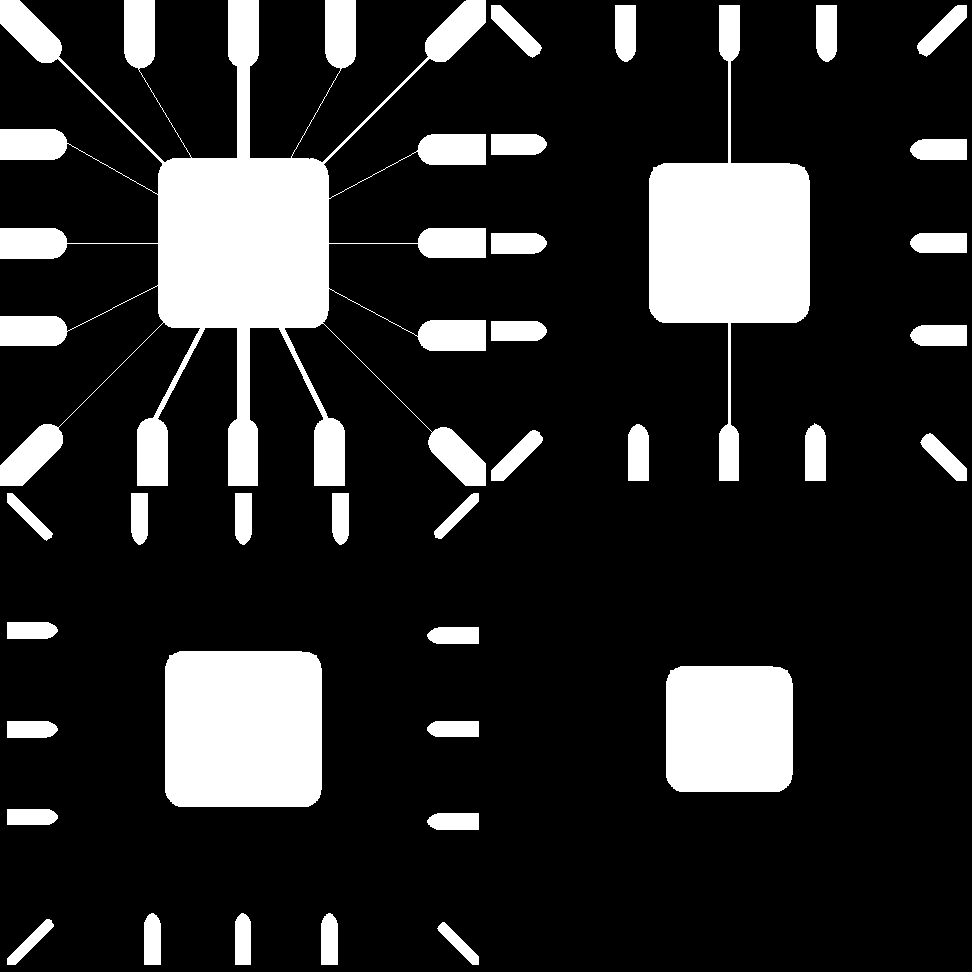

In [ ]:
def erosion(image, se):
  image = (image / 255).astype(image.dtype)
  img_rows,img_cols = image.shape
  se_rows,se_cols = se.shape

  pad_rows,pad_cols = (se_rows - 1) // 2 , (se_cols - 1) // 2
  padded_image = np.pad(image, ((pad_rows, pad_rows), (pad_cols, pad_cols)), mode='constant', constant_values=0)


  eroded_image = np.zeros_like(image)
  for row in range(img_rows):
    for col in range(img_cols):
      rio = padded_image[row : row + se_rows, col : col + se_cols]
      union = np.union1d(rio,se)
      eroded_image[row,col] = 0 if (union.min()) == 0 else 1
  return eroded_image * 255


original_image = cv2.imread(path + 'Fig0905(a)(wirebond-mask).tif', cv2.IMREAD_GRAYSCALE)

se11 = np.ones((11,11))
se15 = np.ones((15,15))
se45 = np.ones((45,45))

ero_img11 = erosion(original_image,se11)
ero_img15 = erosion(original_image,se15)
ero_img45 = erosion(original_image,se45)


cv2_imshow(cv2.vconcat([cv2.hconcat([original_image,ero_img11]),cv2.hconcat([ero_img15,ero_img45])]))


**DILATION**

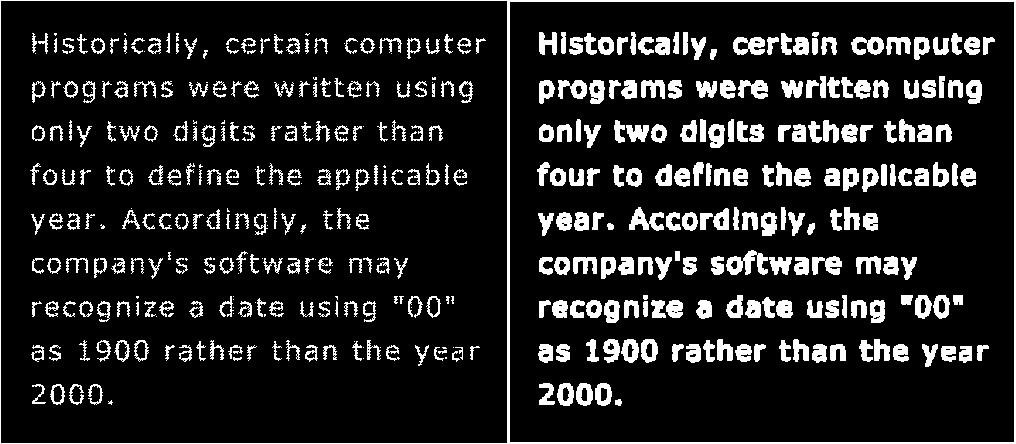

In [ ]:
def dilation(image, se):
  img_rows,img_cols = image.shape
  se_rows,se_cols = se.shape

  pad_rows,pad_cols = (se_rows - 1) // 2 , (se_cols - 1) // 2
  padded_image = np.pad(image, ((pad_rows, pad_rows), (pad_cols, pad_cols)), mode='constant', constant_values=0)


  eroded_image = np.zeros_like(image)
  for row in range(img_rows):
    for col in range(img_cols):
      rio = padded_image[row : row + se_rows, col : col + se_cols]
      union = np.union1d(rio,se)
      eroded_image[row,col] = 255 if (union.max()) == 255 else 0
  return eroded_image

original_image = cv2.imread(path + 'Fig0907(a)(text_gaps_1_and_2_pixels).tif',cv2.IMREAD_GRAYSCALE)

se = np.ones((3,3))
dil_img = dilation(original_image, se)


cv2_imshow(cv2.hconcat([original_image,dil_img]))


# **2. OPENING AND CLOSING**

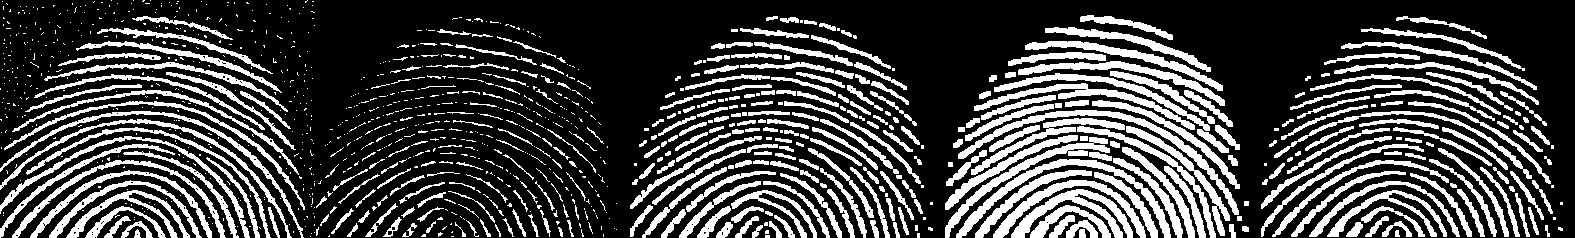

In [ ]:
def opening(image,se):
  eroded = erosion(image,se)
  opened_image = dilation(eroded,se)
  return opened_image

def closing(image,se):
  dilated = dilation(image,se)
  closed_image = erosion(dilated,se)
  return closed_image

original_image = cv2.imread(path + 'Fig0911(a)(noisy_fingerprint).tif',cv2.IMREAD_GRAYSCALE)
es = np.ones((3,3))
ero = erosion(original_image,se)
opened = dilation(ero,es) # opening (o) : first apply erosion and then apply dilation on result
dil = dilation(opened,es)
closing = erosion(dil,es) # closing (.) : first apply dilation and then apply erosion on result.. in this case we apply dilation on opening.. (A o B) . B
cv2_imshow(cv2.hconcat([original_image,ero,opened,dil,closing]))

# **3.SOME BASIC MORPHOLOGICAL ALGORITHMS**

**BOUNDARY EXTRACTION**

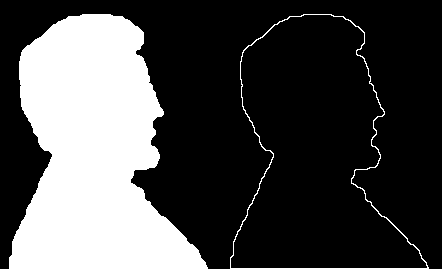

In [ ]:
def boundary_extraction (image, se):
  eroded_image = erosion(image, se)
  extracted_boudary = image - eroded_image
  return extracted_boudary

original_image = cv2.imread( path + 'Fig0914(a)(licoln from penny).tif',cv2.IMREAD_GRAYSCALE)
se = np.ones((3,3))
extracted_image = boundary_extraction(original_image,se)
cv2_imshow(cv2.hconcat([original_image, extracted_image]))

**HOLE FILLING**

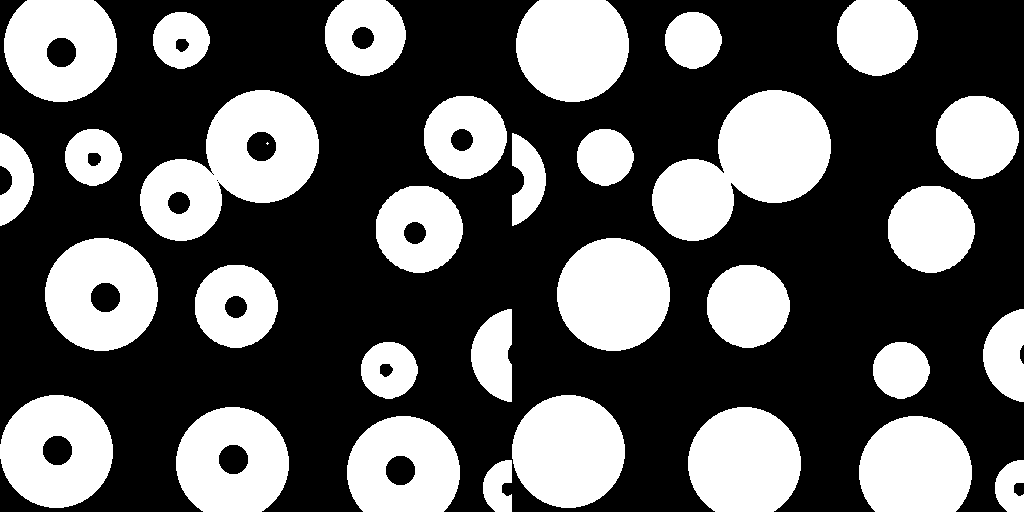

In [ ]:
# from skimage.measure import label, find_contours
# def find_hole_coordinates(binary_image):
#     # Find connected components
#     labeled_image, num_labels = label(binary_image)

#     # Initialize array to store coordinates of first pixel of each hole
#     hole_coordinates = []

#     # Iterate over each connected component
#     for label in range(1, num_labels+1):
#         # Extract the connected component corresponding to the label
#         component = (labeled_image == label)

#         # Find contours of the connected component
#         contours, _ = find_contours(component, 0.5)

#         # Iterate over contours
#         for contour in contours:
#             # Check if contour is a hole (inner contour)
#             if len(contour) > 20:  # Adjust threshold for minimum contour length as per your requirement
#                 # Find the coordinates of the first pixel of the hole
#                 first_pixel = contour[0]
#                 hole_coordinates.append(first_pixel)
#                 # break  # Only consider the first hole in the component

#     return hole_coordinates

# def hole_dilation(roi,se):
#   pad_rows, pad_cols = (roi - 1) // 2, (roi - 1) // 2
#   padded_roi = np.pad(roi,(pad_rows,pad_cols), mode =  'constant', constant_values = 0)
#   filled_hole = np.zeros_like(roi)
#   for x in range(roi.shape[0]):
#     for y in range(roi.shape[1]):
#       filled_hole = 1 if np.max(roi * padded_roi[x : x + 3, y : y + 3]) == 1 else 0
#   return filled_hole

# def fill_holes(image,se):
#   img_rows,img_cols = image.shape
#   filled_hole_img = np.zeros_like(image)
#   roi,x,y = find_hole_coordinates(image)
#   if roi != None:
#    filled_roi = hole_dilation(roi,se)
#    roi_comp = np.where((image[x-1:x+2, y-1,y+2] ==1),0,1)
#    filled_hole_img[x-1: x+1, y-1:y+2] = filled_roi * roi_comp

#    return filled_roi




# def fill_hole(image,hole_x, hole_y):
#   filled_image = np.zeros_like(image)
#   fileled_image[hole_x,hole_y]

# def fill_hole(image,hole_x, hole_y):
#   filled_image = np.zeros_like(image)
#   fileled_image[hole_x,hole_y]
from scipy import ndimage
original_image = cv2.imread( path + 'Fig0916(a)(region-filling-reflections).tif', cv2.IMREAD_GRAYSCALE)
filled_hole_image = (ndimage.binary_fill_holes(original_image / 255) * 255).astype(original_image.dtype)
cv2_imshow(cv2.hconcat([original_image, filled_hole_image]))

**CONVEX HULL**

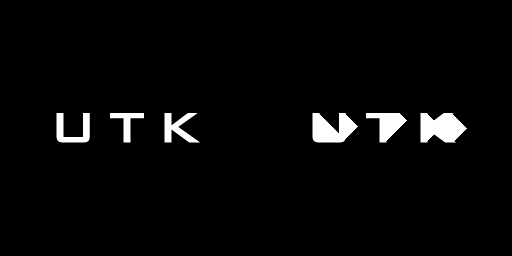

In [ ]:
def hm_transformation(image,se):
  img_rows, img_cols = image.shape
  se_rows,se_cols = se.shape

  pad_rows, pad_cols = (se_rows - 1) // 2, (se_cols - 1) // 2
  padded_image = np.pad(image, (pad_rows,pad_cols), mode = 'constant', constant_values = 0)

  hmt_image = np.zeros_like(image)

  for row in range(img_rows):
    for col  in range(img_cols):
      roi = padded_image[row : row + se_rows, col : col + se_cols]
      masked_se = se.copy()
      masked_se[masked_se == -1] = roi[masked_se == -1]

      if np.all(roi[masked_se == 1] == 1):
        hmt_image[row,col] = 1
      else:
        hmt_image[row,col] = 0
  return hmt_image


def convex_hull(image,se_s):
  image = image / 255
  x_curr = np.copy(image)
  x_pre = np.zeros((image.shape[0], image.shape[1]))
  convex_hull = np.zeros_like(image)
  d = []
  for i in range(4):
    while np.any(x_curr != x_pre):
      x_pre = x_curr
      x_curr = np.maximum(hm_transformation(x_pre, se_s[i]),x_pre)

    d.append(x_curr)
    if i == 1:
      convex_hull = np.maximum(d[i],d[i-1])
    elif i > 1:
      convex_hull = np.maximum(convex_hull,d[i])
  return (convex_hull * 255).astype(np.uint8)

original_image = cv2.imread(path+'FigP0919(UTK).tif',cv2.IMREAD_GRAYSCALE)
se1 = np.array([[1,-1,-1],
               [1,0,-1],
               [1,-1,-1]])

se2 = np.array([[1,1,1],
               [-1,0,-1],
               [-1,-1,-1]])

se3 = np.array([[-1,-1,1],
               [-1,0,1],
               [-1,-1,1]])

se4 = np.array([[-1,-1,-1],
               [-1,0,-1],
               [1,1,1]])

se_s = [se1, se2, se3, se4]

cv2_imshow(cv2.hconcat([original_image,convex_hull(original_image,se_s)]))


**THINING**

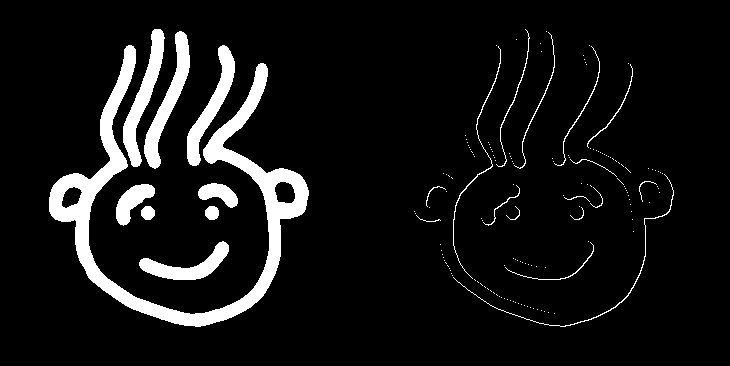

In [ ]:
def thinning(image,se_s):
  image = image / 255
  pre = np.zeros_like(image)
  curr = image
  thinned_image = np.zeros_like(image)
  while np.any((curr != pre)):
    pre = curr
    for i in range(len(se_s)):
      hmt = hm_transformation(image,se_s[i])
      hmt_comp = np.logical_not(hmt) * 1
      curr = np.logical_and(image,hmt_comp) * 1
  thinned_image = curr
  return (thinned_image*255).astype(np.uint8)

original_image = cv2.imread('/content/Thinning_cartoon_face_binary.png', cv2.IMREAD_GRAYSCALE)
se1 = np.array([[0,0,0],[-1,1,-1],[1,1,1]])
se2 = np.array([[-1,0,0],[1,1,0],[1,1,-1]])
se3 = np.array([[1,-1,0],[1,1,0],[1,-1,0]])
se4 = np.array([[1,1,-1],[1,1,0],[-1,0,0]])
se5 = np.array([[1,1,1],[-1,1,-1],[0,0,0]])
se6 = np.array([[-1,1,1],[0,1,1],[0,0,-1]])
se7 = np.array([[0,-1,1],[0,1,1],[0,-1,1]])
se8 = np.array([[0,0,-1],[0,1,1],[-1,1,1]])

se_s = [se1,se2,se3,se4,se5,se6,se7,se8]
thinned_image = thinning(original_image,se_s)
cv2_imshow(cv2.hconcat([original_image,thinned_image]))

**THICKENING**

In [ ]:
def thickening(image,se_s):
  image = image / 255
  pre = np.zeros_like(image)
  curr = image
  thinned_image = np.zeros_like(image)
  while np.any((curr != pre)):
    pre = curr
    for i in range(len(se_s)):
      hmt = hm_transformation(image,se_s[i])
      curr = np.logical_or(image,hmt) * 1
  thinned_image = curr
  return (thinned_image*255).astype(np.uint8)

se1 = np.array([[1,1,1],[-1,0,-1],[0,0,0]])
se2 =  np.rot90(se1, k=-1)
se3 =  np.rot90(se2, k=-1)
se4 =  np.rot90(se3, k=-1)
se5 =  np.rot90(se4, k=-1)
se6 =  np.rot90(se5, k=-1)
se7 =  np.rot90(se6, k=-1)
se8 =  np.rot90(se7, k=-1)

se_s = [se1,se2,se3,se4,se5,se6,se7,se8]
thickened_image = thickening(thinned_image,se_s)
cv2_imshow(thickened_image)

KeyboardInterrupt: 

**SELETONS**

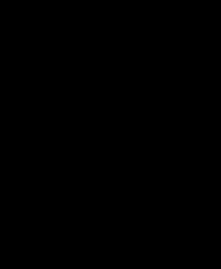

In [ ]:
def erosion(image, se):
  image = (image / 255).astype(image.dtype)
  img_rows,img_cols = image.shape
  se_rows,se_cols = se.shape

  pad_rows,pad_cols = (se_rows - 1) // 2 , (se_cols - 1) // 2
  padded_image = np.pad(image, ((pad_rows, pad_rows), (pad_cols, pad_cols)), mode='constant', constant_values=0)


  eroded_image = np.zeros_like(image)
  for row in range(img_rows):
    for col in range(img_cols):
      rio = padded_image[row : row + se_rows, col : col + se_cols]
      val = rio * se
      eroded_image[row,col] = 0 if val.min() == 0 else 1
  return eroded_image * 255

def dilation(image, se):
  image = (image / 255).astype(image.dtype)
  img_rows,img_cols = image.shape
  se_rows,se_cols = se.shape

  pad_rows,pad_cols = (se_rows - 1) // 2 , (se_cols - 1) // 2
  padded_image = np.pad(image, ((pad_rows, pad_rows), (pad_cols, pad_cols)), mode='constant', constant_values=0)


  dilated_image = np.zeros_like(image)
  for row in range(img_rows):
    for col in range(img_cols):
      rio = padded_image[row : row + se_rows, col : col + se_cols]
      val = rio * se
      dilated_image[row,col] = 1 if (val.max()) == 1 else 0
  return dilated_image * 255

def opening(image,se):
  eroded = erosion(image,se)
  opened_image = dilation(eroded,se)
  return opened_image


def skeletons(image,se):
  image = image / image.max()
  pre =  np.zeros_like(image)
  curr = image
  skeleton_image = np.zeros_like(image)
  while True:
    pre = curr
    curr = erosion(pre,se)
    if np.all((curr == 0)):
      break

  skeleton_image = np.logical_and(pre,opening(pre,se))
  return skeleton_image * 255

original_image = cv2.imread(path +'Fig0914(a)(licoln from penny).tif',cv2.IMREAD_GRAYSCALE)
skeletoned_image = skeletons(original_image,np.ones((3,3)))
cv2_imshow(skeletoned_image)


# **4. MORPHOLOGICAL RECONSTRUCTION**

**i. GEODESIC DILATION AND EROSION**

**ii. MORPHOLOGICAL RECONSTRUCTION BY DILATION AND BY EROSION**




In [ ]:
def geodesic_dilation(marker,mask,se):
  g_dilated_image = np.logical_and(dilation(marker*255,se)/255,mask) * 1
  return g_dilated_image

def geodesic_erosion(marker,mask,se):
  g_eroded_image = np.logical_or(erosion(marker*255,se)/255,mask) * 1
  return g_eroded_image

def reconst_by_dilation(marker,mask):
  marker,mask = marker/255, mask / 255
  se = np.ones((3,3))
  curr = marker
  pre = np.zeros_like(marker)
  while True:
    pre = curr
    curr = geodesic_dilation(pre,mask,se)
    if np.all(curr == pre):
      break
  reconst_image = curr
  return reconst_image

def reconst_by_erosion(marker,mask):
  marker,mask = marker/255, mask / 255
  se = np.ones((3,3))
  curr = marker
  pre = np.zeros_like(marker)
  while np.all(curr != pre):
    pre = curr
    curr = geodesic_erosion(pre,mask,se)

  reconst_image = pre
  return reconst_image

**SAMPLE APPLICATIONS**

**1. OPENING BY RECONSTRUCTION**


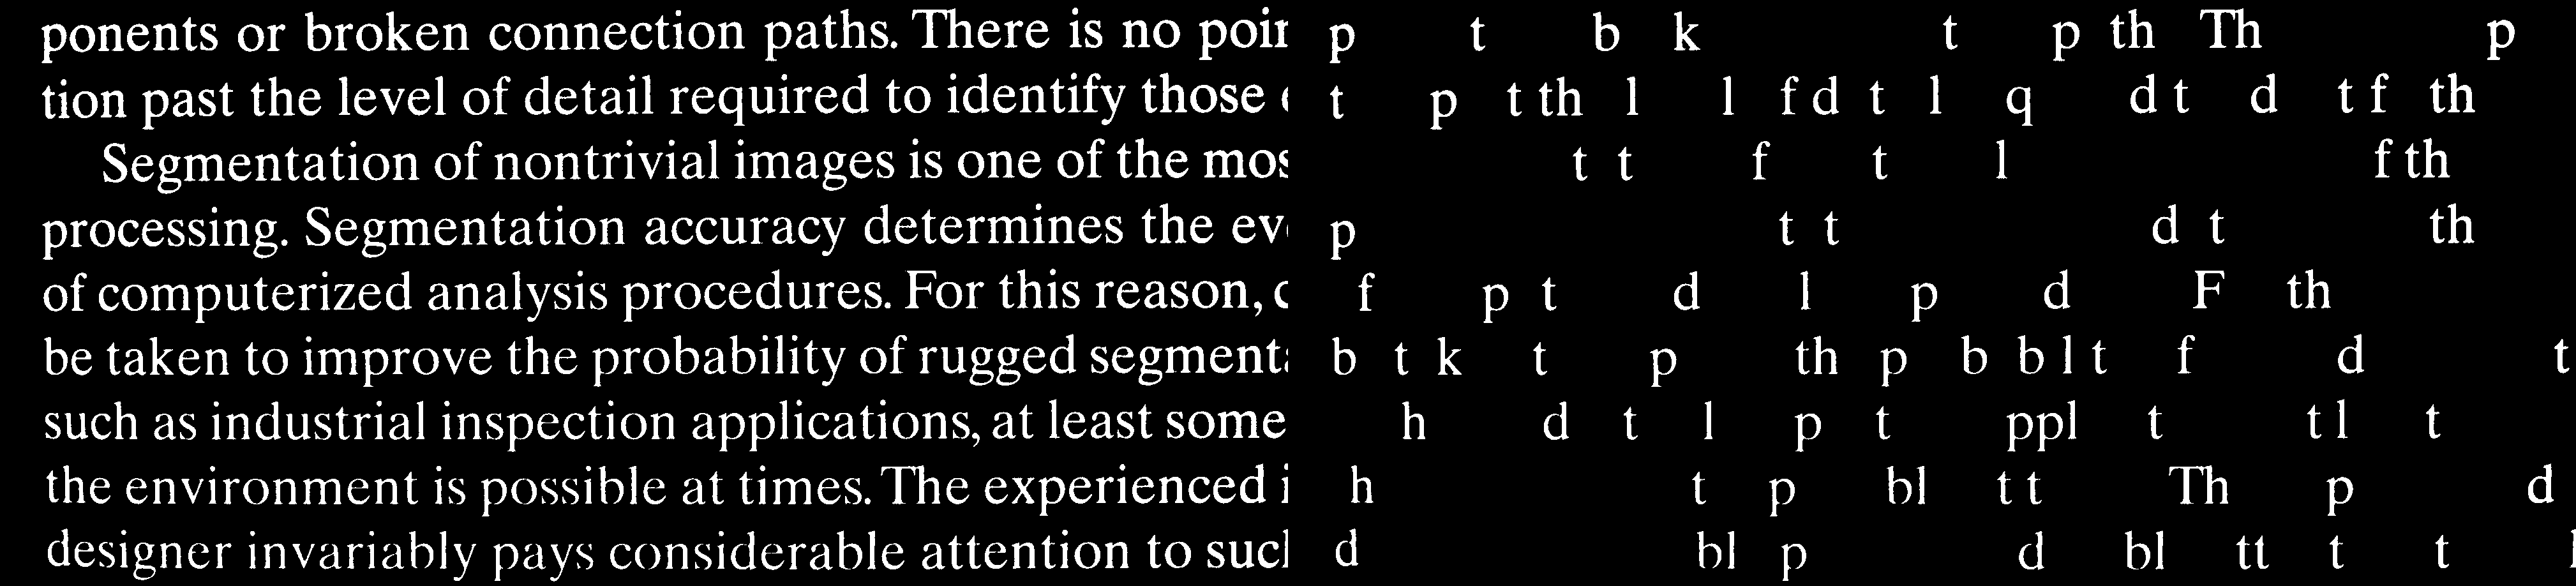

In [ ]:
def opening_by_reconst(image,se):
  marker = erosion(image,se)
  # cv2_imshow(marker)
  mask = image
  opened_image = reconst_by_dilation(marker,mask) * 255
  return opened_image.astype(np.uint8)

original_image = cv2.imread(path + 'Fig0929(a)(text_image).tif',cv2.IMREAD_GRAYSCALE)
se = np.ones((51,1))
opened_image = opening_by_reconst(original_image,se)
cv2_imshow(cv2.hconcat([original_image,opened_image]))


**2. AUTOMATIC ALGORITHM FOR HOLE FILLING**

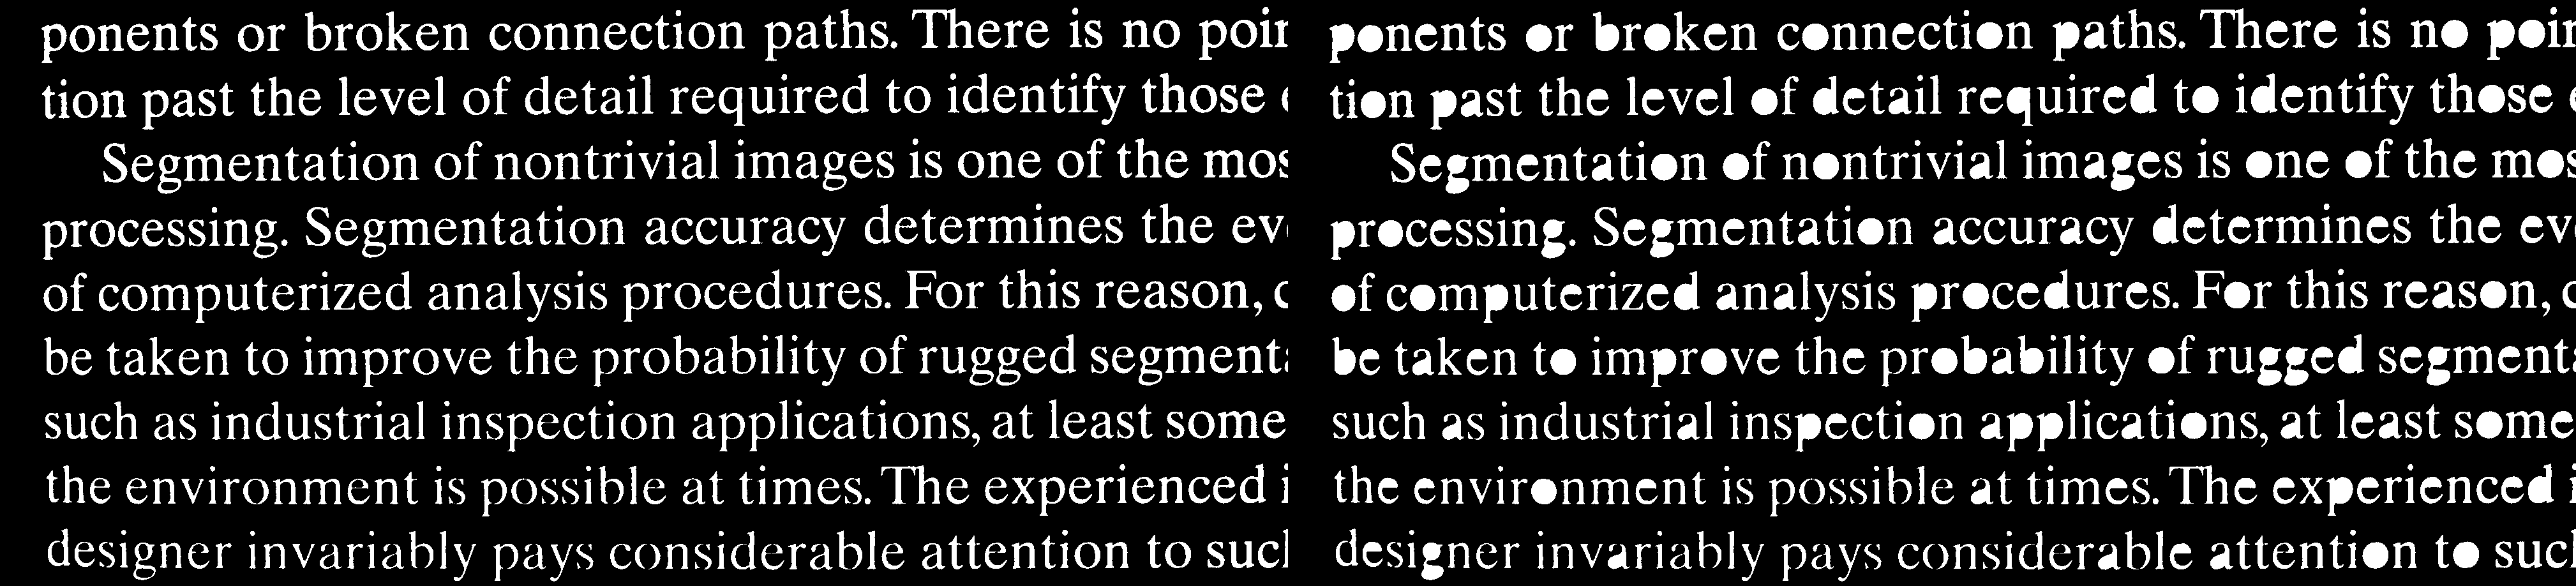

In [ ]:
def auto_hole_filling(image):
  marker = np.zeros_like(image)
  marker[:, 0] = 255 - image[:, 0]
  marker[:, -1] = 255 - image[:, -1]
  marker[0, :] = 255 - image[0, :]
  marker[-1, :] = 255 - image[-1, :]
  mask = np.logical_not(image/255) * 255
  rec_by_dil = reconst_by_dilation(marker,mask)
  hole_filled_img = np.logical_not(rec_by_dil) * 255
  return hole_filled_img.astype(np.uint8)

original_image = cv2.imread(path + 'Fig0929(a)(text_image).tif',cv2.IMREAD_GRAYSCALE)
filled_holes = auto_hole_filling(original_image)
cv2_imshow(cv2.hconcat([original_image,filled_holes]))

# **5. GRAYSCALE MORPHOLOGY**

**GRAYSCALE EROSION AND DILATION**

**GRAYSCAL EROSION**

1. Create a structuring element of 1's i.e 3x3
2. Do the operation sliding that the SE center visits each location in image
3. When region of image coincide with SE.. then pick the minimum value among the 9 elements and assign to the processing pixel.

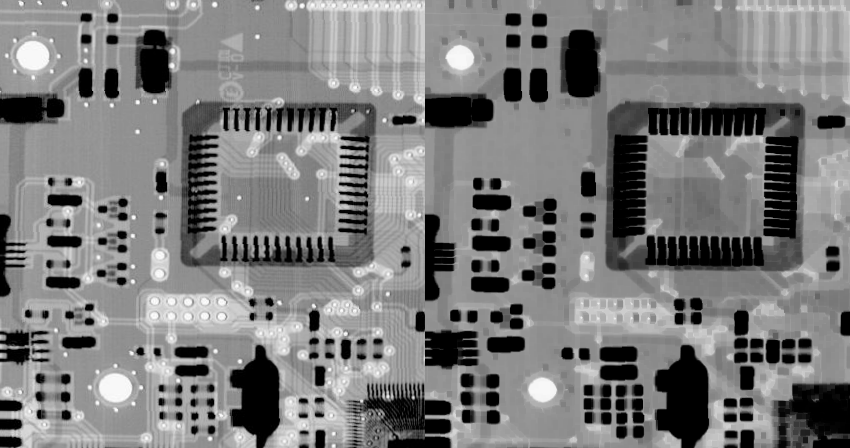

In [ ]:
def grayscale_erosion(image,se):
  image_rows,image_cols = image.shape
  se_rows,se_cols = se.shape

  pad_rows,pad_cols = se_rows -1 , se_cols - 1
  padded_image = np.pad(image,(pad_rows,pad_cols),mode='reflect')

  grayscale_eroded_image = np.zeros_like(image)

  for row in range(image_rows):
    for col in range(image_cols):
      grayscale_eroded_image[row,col] = np.min( se * padded_image[row: row + se_rows,col : col + se_cols])

  return (grayscale_eroded_image).astype(np.uint8)

original_image = cv2.imread(path + 'Fig0935(a)(ckt_board_section).tif',cv2.IMREAD_GRAYSCALE)
se = np.ones((5,5))
g_eroded_image = grayscale_erosion(original_image,se)
cv2_imshow(cv2.hconcat([original_image,g_eroded_image]))

**GRAYSCALE DILATION**

Same as erosion but;
1. Rotate the SE along center
2. Choose maximum value instead of  minimum among 9 elements and assign to the processing pixels

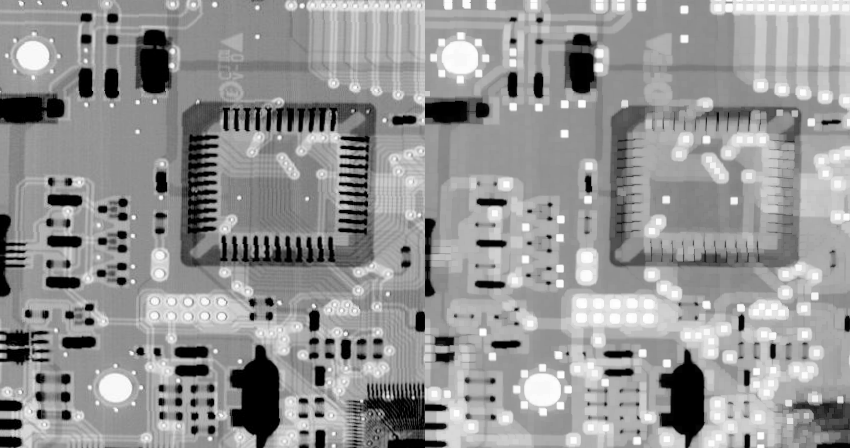

In [ ]:
def grayscale_dilation(image,se):
  image_rows,image_cols = image.shape
  se_rows,se_cols = se.shape

  pad_rows,pad_cols = se_rows - 1 , se_cols - 1
  padded_image = np.pad(image,(pad_rows,pad_cols),mode='reflect')

  grayscale_dilated_image = np.zeros_like(image)

  for row in range(image_rows):
    for col in range(image_cols):
      grayscale_dilated_image[row,col] = np.max( se * padded_image[row: row + se_rows,col : col + se_cols])

  return (grayscale_dilated_image).astype(np.uint8)

original_image = cv2.imread(path + 'Fig0935(a)(ckt_board_section).tif',cv2.IMREAD_GRAYSCALE)
se = np.ones((5,5))
rot_se = np.rot90(np.rot90(se,-1),-1)
g_dilated_image = grayscale_dilation(original_image,rot_se)
cv2_imshow(cv2.hconcat([original_image,g_dilated_image]))

**GRAYSCALE OPENING AND CLOSING**

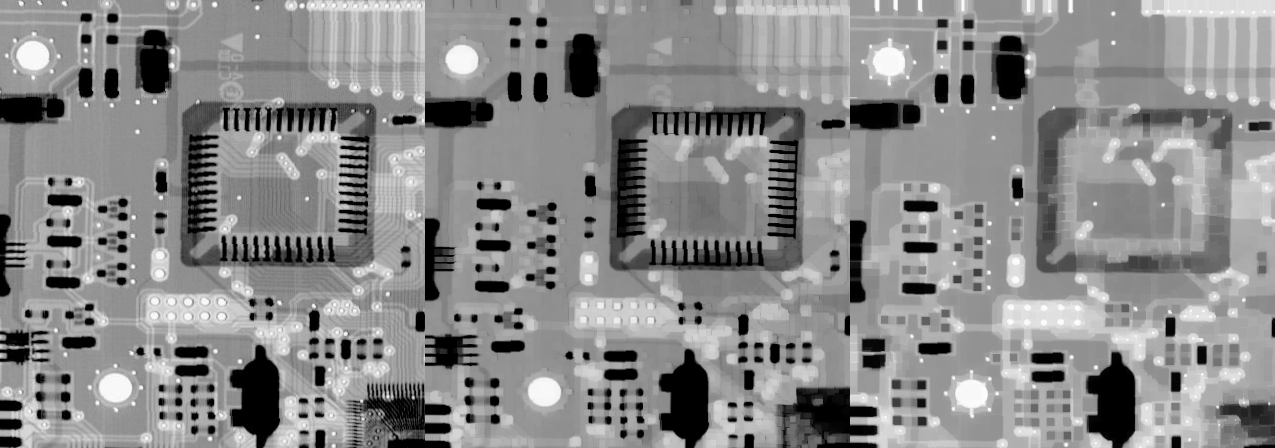

In [ ]:
def grayscale_opening(image,se):
  g_eroded_image = grayscale_erosion(image,se)
  opened_image = grayscale_dilation(g_eroded_image,se)
  return opened_image

def grayscale_closing(image,se):
  g_dilated_image = grayscale_dilation(image,se)
  closed_image = grayscale_erosion(g_dilated_image,se)
  return closed_image

original_image = cv2.imread(path + 'Fig0935(a)(ckt_board_section).tif',cv2.IMREAD_GRAYSCALE)
se_1 = np.ones((5,5))
se_2 = np.ones((7,7))

opened_image = grayscale_opening(original_image,se_1)
closed_image = grayscale_closing(original_image,se_2)
cv2_imshow(cv2.hconcat([original_image,opened_image,closed_image]))


# **6. SOME BASIC GRAYSCALE MORPHOLOGICAL ALGORITHMS**

**a. MORPHOLOGICAL SMOOTHING**

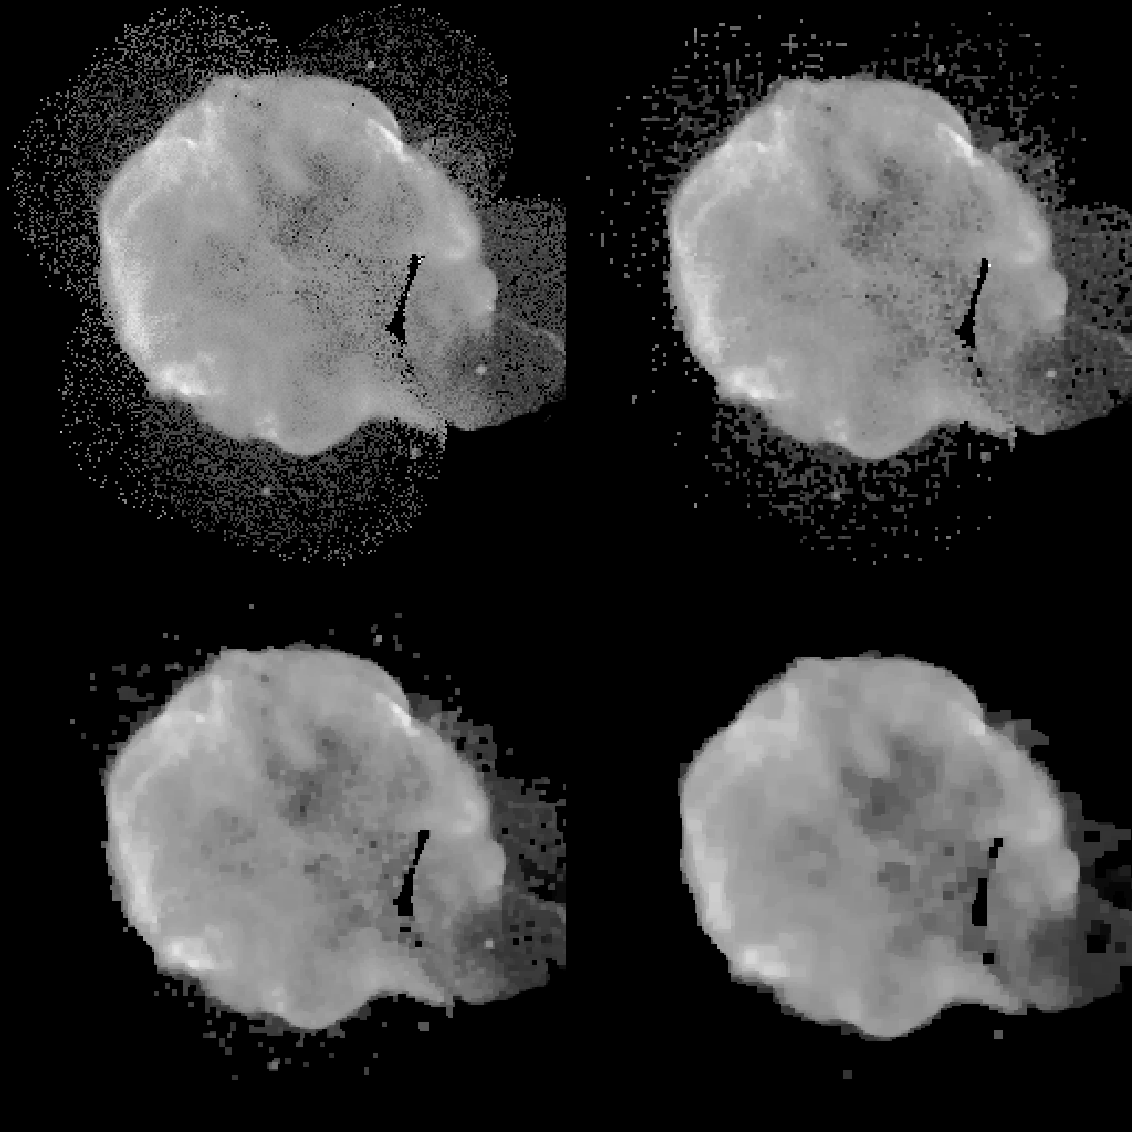

In [ ]:
def morphological_smoothing(image,se):
  opened_image = grayscale_opening(image,se)
  smoothed_image = grayscale_closing(opened_image, se)
  return smoothed_image

original_image = cv2.imread(path+'Fig0938(a)(cygnusloop_Xray_original).tif',cv2.IMREAD_GRAYSCALE)
se_1,se_2,se_3 = np.ones((3,3)), np.ones((5,5)),np.ones((9,9))
smoothed_image_1 = morphological_smoothing(original_image, se_1)
smoothed_image_2 = morphological_smoothing(original_image, se_2)
smoothed_image_3 = morphological_smoothing(original_image,se_3)
cv2_imshow(cv2.vconcat([cv2.hconcat([original_image,smoothed_image_1]),cv2.hconcat([smoothed_image_2,smoothed_image_3])]))


**b. MORPHOLOGICAL GRADIENT**

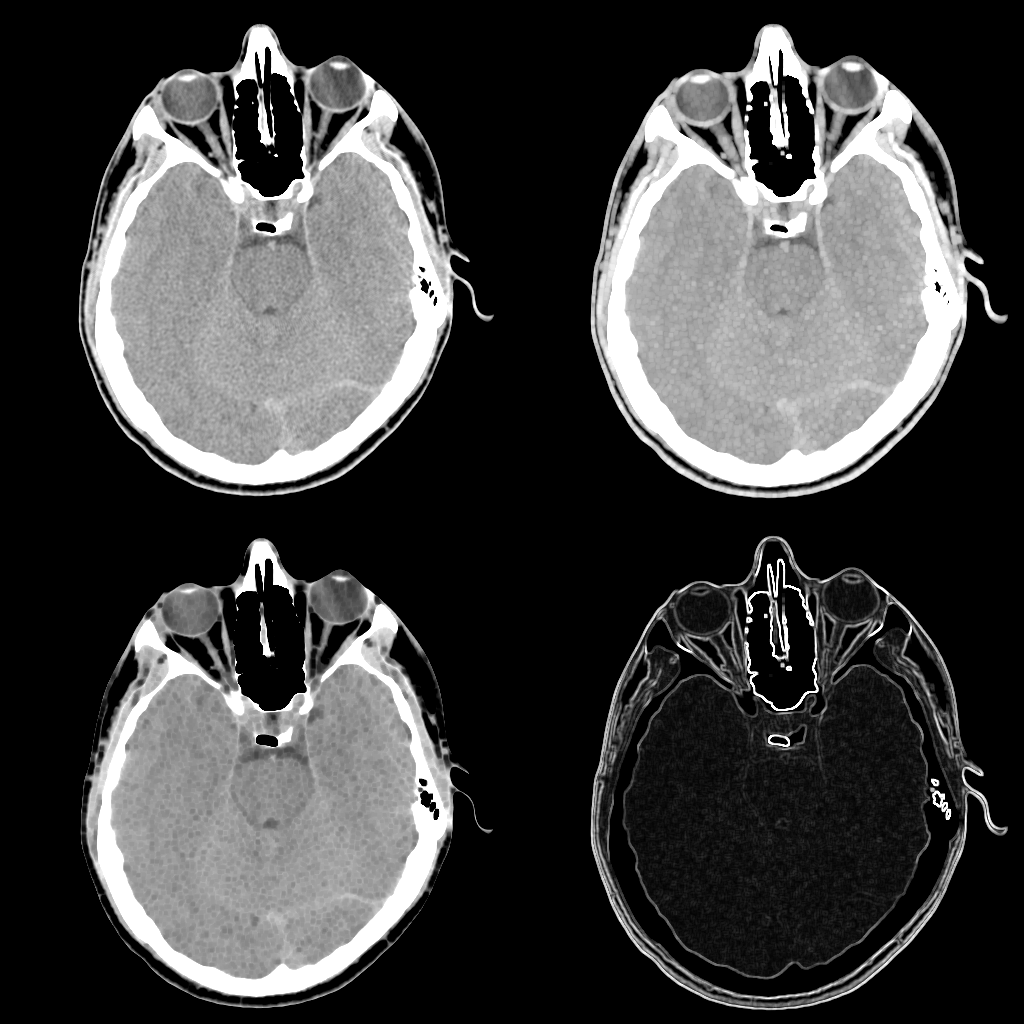

In [ ]:
def morphological_gradient(image,se):
  g_dilated_image = grayscale_dilation(image,se)
  g_eroded_image = grayscale_erosion(image,se)
  gradient_image = g_dilated_image - g_eroded_image
  return gradient_image

original_image = cv2.imread(path+'Fig0939(a)(headCT-Vandy).tif',cv2.IMREAD_GRAYSCALE)
se = np.ones((3,3))
dilated_image = grayscale_dilation(original_image,se)
eroded_image = grayscale_erosion(original_image,se)
gradient_image = morphological_gradient(original_image,se)

cv2_imshow(cv2.vconcat([cv2.hconcat([original_image,dilated_image]),cv2.hconcat([eroded_image, gradient_image])]))

**c. TOP-HAT AND BOTTOM-HAT TRANSFORMATIONS**

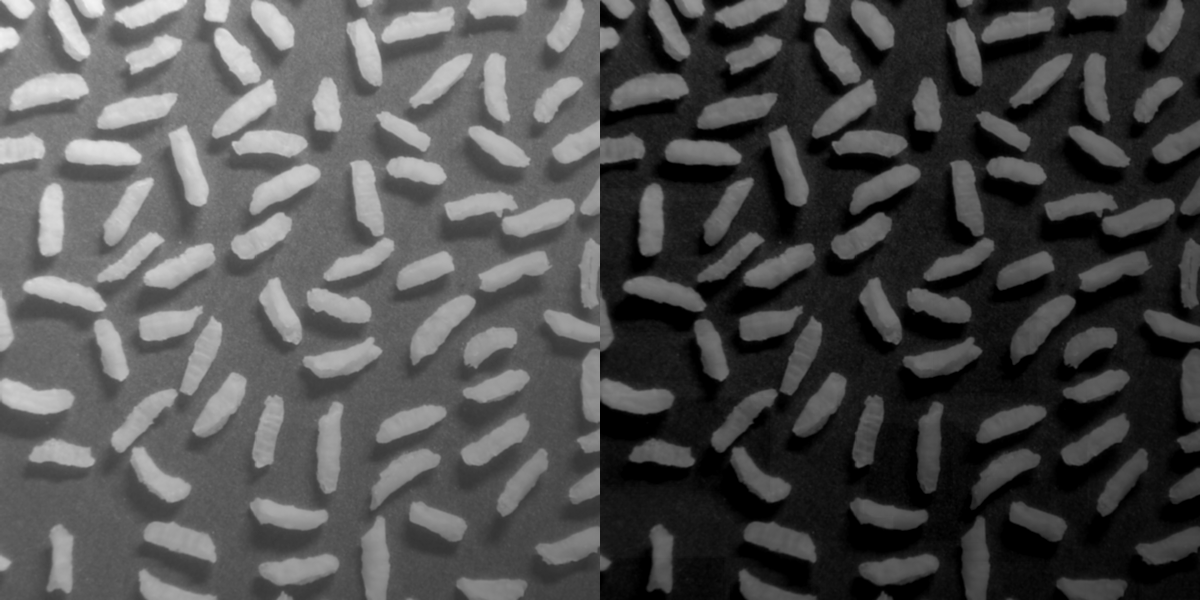

In [ ]:
def top_hat_transformation(image,se):
  opened_image = grayscale_opening(image,se).astype(np.int8)
  top_hat_trans_img = np.where((image - opened_image) < 0,0,image - opened_image).astype(np.uint8)
  return top_hat_trans_img

def bottom_hat_transformation(image,se):
  bot_hat_trans_img = grayscale_closing(image,se) - image
  return bot_hat_trans_img

original_image = cv2.imread(path + 'Fig0940(a)(rice_image_with_intensity_gradient).tif',cv2.IMREAD_GRAYSCALE)
se = np.ones((81,81))
top_hat_trans_image = top_hat_transformation(original_image,se)
cv2_imshow(cv2.hconcat([original_image,top_hat_trans_image]))


**d. GRANULOMETRY**

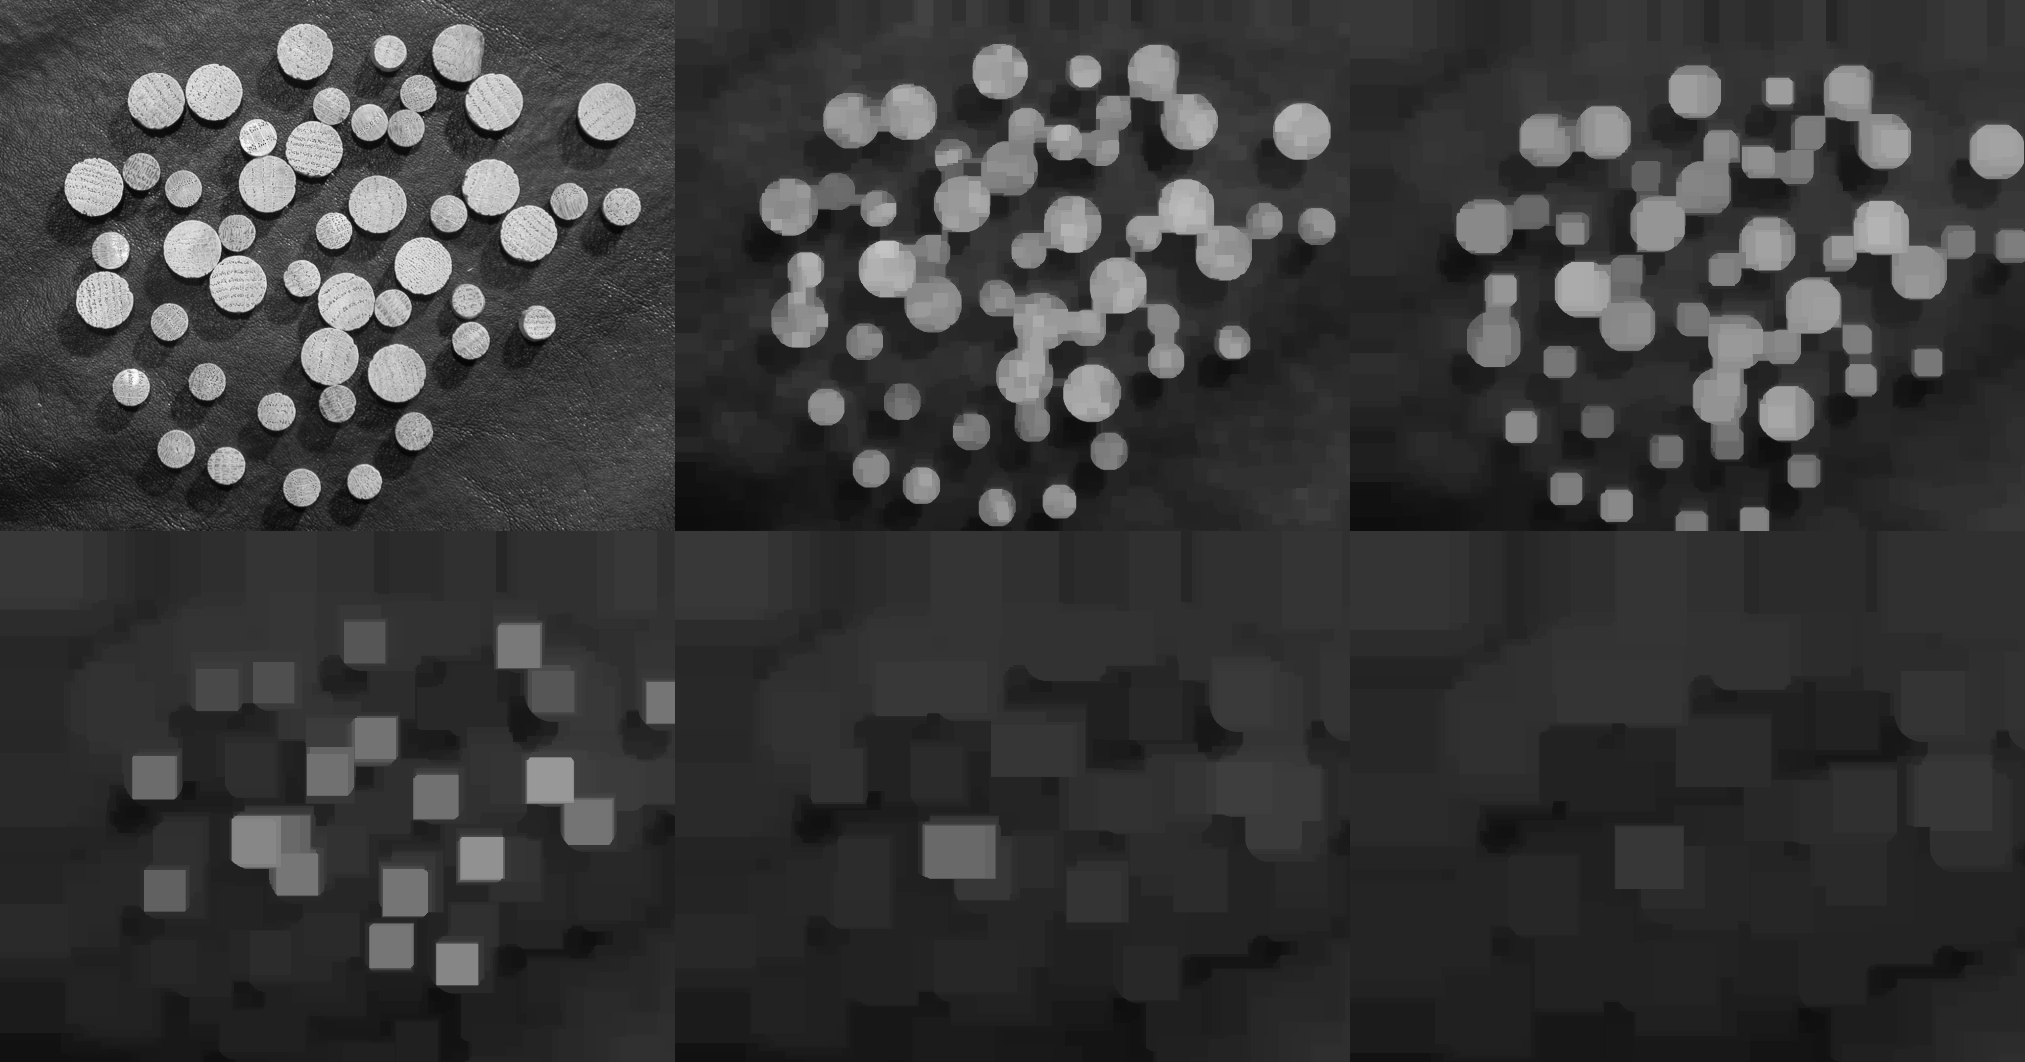

In [ ]:
def granulometry(image,se_s):
  output_images = [grayscale_opening(image,se_s[i]) for i in range(len(se_s))]
  surface_areas = [np.sum(output_images[i]) for i in range(len(output_images))]
  differences = [surface_areas[i] - surface_areas[i+1] for i in range(len(surface_areas)-1)]

  return[output_images,differences]

original_image = cv2.imread(path + 'Fig0941(a)(wood_dowels).tif',cv2.IMREAD_GRAYSCALE)
se_1,se_2,se_3,se_4,se_5 = np.ones((11,11)),np.ones((21,21)),np.ones((41,41)),np.ones((51,51)),np.ones((61,61))
se_s = [se_2,se_3,se_4,se_5]
smoothed_image = morphological_smoothing(original_image,se_1)
images, differences = granulometry(smoothed_image,se_s)
cv2_imshow(cv2.vconcat([cv2.hconcat([original_image,smoothed_image,images[0]]),cv2.hconcat([images[1],images[2],images[3]])]))

**e. TEXTURAL SEGMENTATION**

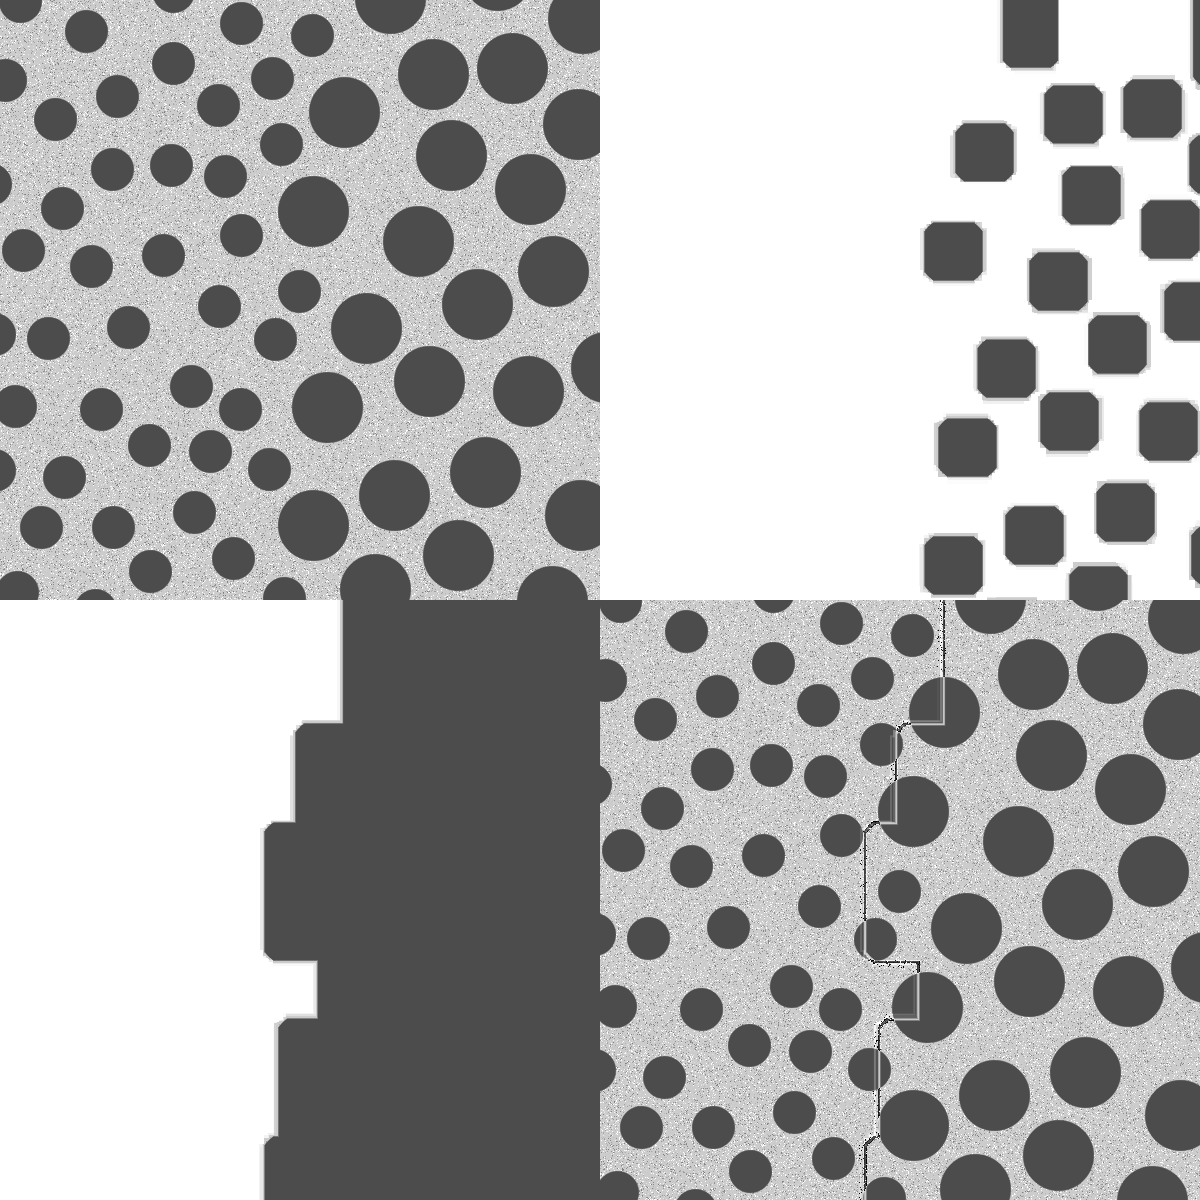

In [ ]:
original_image = cv2.imread(path+'Fig0943(a)(dark_blobs_on_light_background).tif',cv2.IMREAD_ANYCOLOR)
closed_image = grayscale_closing(original_image,np.ones((41,41)))
eroded_image = grayscale_erosion(closed_image,np.ones((81,141)))
gradient = morphological_gradient(eroded_image,np.ones((3,3)))
segmented_image = original_image + gradient
cv2_imshow(cv2.vconcat([cv2.hconcat([original_image,closed_image]),cv2.hconcat([eroded_image,segmented_image])]))

**f. GRAYSCALE MORPHOLOGICAL RECONSTRUCTION**

In [ ]:
def grayscale_geodesic_dilation(marker,mask,se):
  dilated = grayscale_dilation(marker,se)
  gg_dilated_image = np.minimum(dilated,mask)
  return gg_dilated_image

def grayscale_geodesic_erosion(marker,mask,se):
  eroded = grayscale_erosion(marker,se)
  gg_eroded_image = np.maximum(eroded,mask)
  return gg_eroded_image

def grayscale_reconst_by_dilation(marker,mask):
  se = np.ones((3,3))
  curr = np.copy(marker)
  pre = np.zeros_like(marker)
  while True:
    pre = curr
    curr = grayscale_geodesic_dilation(pre,mask,se)
    if np.all(curr == pre):
      break
  reconst_image = curr
  return reconst_image

def grayscale_reconst_by_erosion(marker,mask):
  se = np.ones((3,3))
  curr = np.copy(marker)
  pre = np.zeros_like(marker)
  while np.all(curr != pre):
    pre = curr
    curr = grayscale_geodesic_erosion(pre,mask,se)
  else:
    reconst_image = curr
  return reconst_image

def grascale_opening_by_reconst(image,se,n):
  mask = np.copy(image)
  marker = image
  for i in range(n):
    marker = grayscale_erosion(marker,se)
  opened_image = grayscale_reconst_by_dilation(marker,mask)
  return opened_image

def grayscale_closing_by_reconst(image,se,n):
  mask = np.copy(image)
  marker = image
  for i in range(n):
    marker = grayscale_dilation(marker,se)
  closed_image = grayscale_reconst_by_erosion(marker,mask)
  return closed_image


**USING GRAYSCALE MORPHOLOGICAL RECONSTRUCTION TO FLATTEN A COMPLEX BACKGROUND**

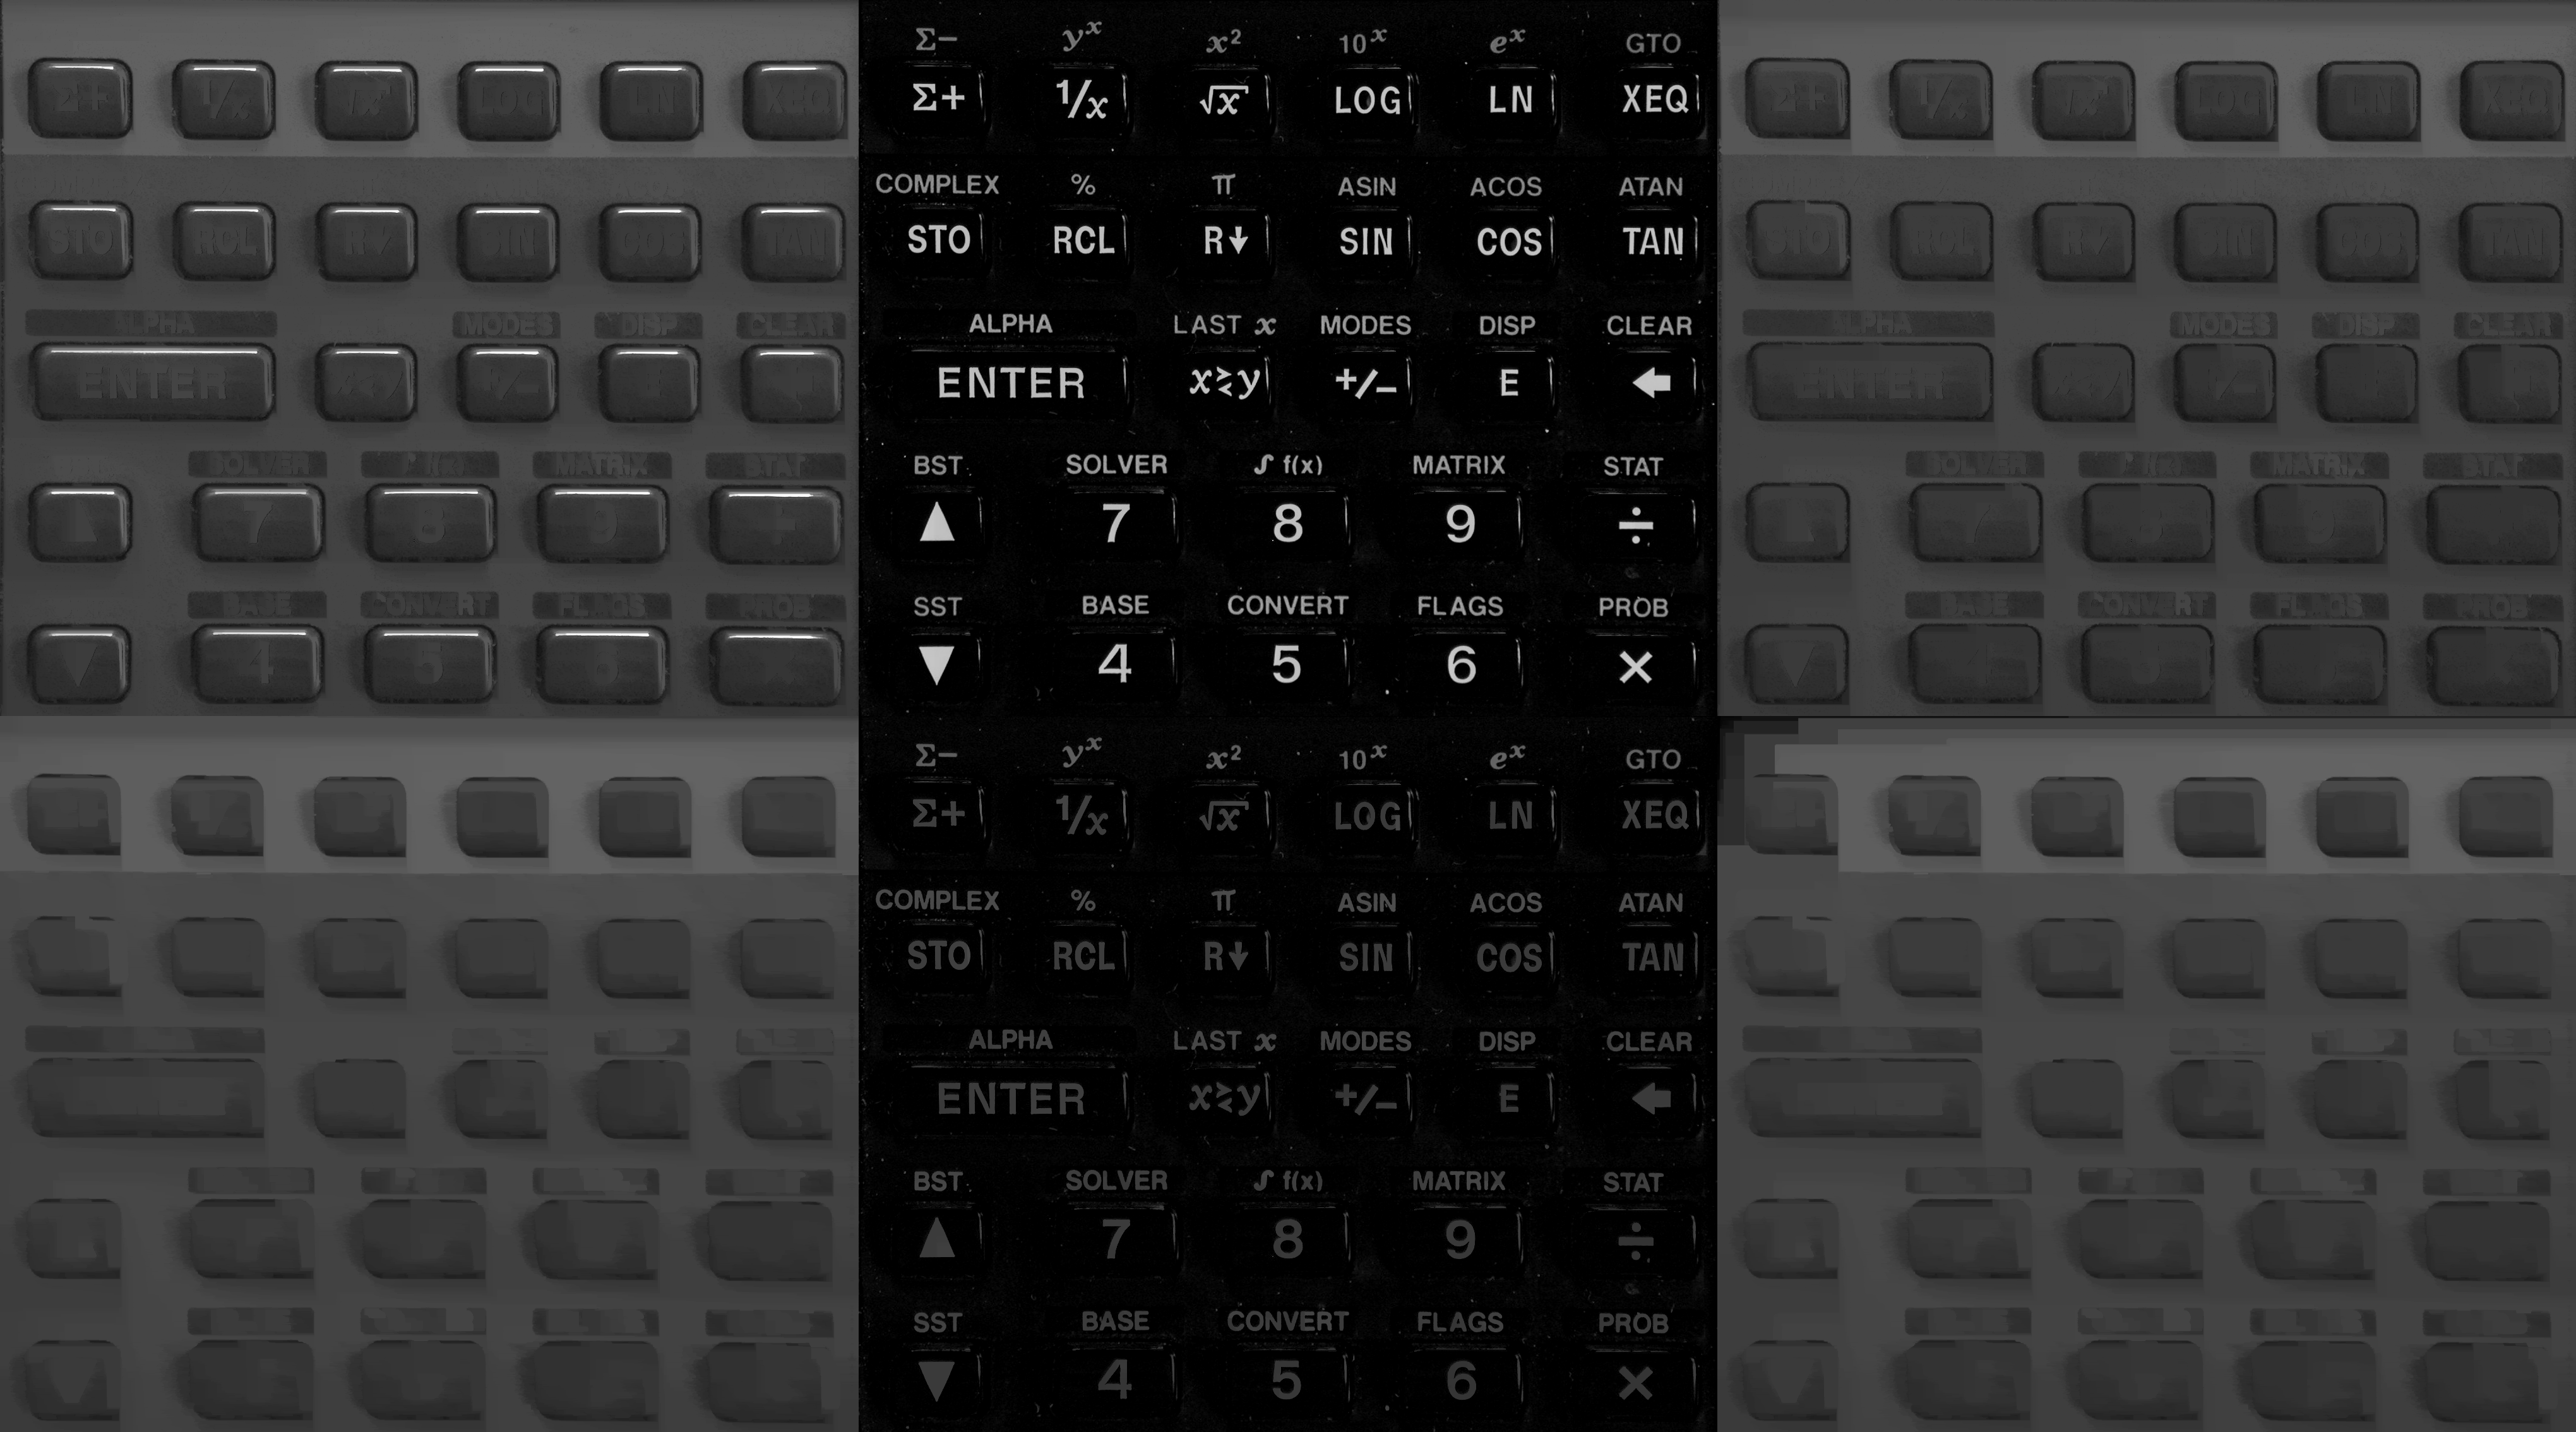

In [ ]:
original_image = cv2.imread(path + 'Fig0944(a)(calculator).tif',cv2.IMREAD_GRAYSCALE)
# opened_image = grascale_opening_by_reconst(original_image,np.ones((1,71)),1)
# print('opened completed')
# top_hat_trans_image = original_image - opened_image
# print('top hat completed')
# opened_image2 = grascale_opening_by_reconst(opened_image,np.ones((25,11)),1)
# print('opened2 completed')
# dilated_image = grayscale_dilation(opened_image2,np.ones((1,21)))
# print('dilTED completed')
# minimum_image = np.minimum(dilated_image,top_hat_trans_image)
# print('minimum completed')
# # flatten_image = grayscale_reconst_by_dilation(minimum_image,dilated_image)
# print('flatten completed')
cv2_imshow(cv2.vconcate([cv2.hconcat([opened_image,top_hat_trans_image,opened_image2]),cv2.hconcat([dilated_image,minimum_image,flatten_image])]))